In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters

In [18]:
df=pd.read_csv('data/Worker Remittance.csv',parse_dates=['Time'],index_col=['Time'])
df.head()

,Rem
Time,
1987-01-01,2303.89
1988-01-01,2477.42
1989-01-01,2496.09
1990-01-01,2725.62
1991-01-01,3241.45


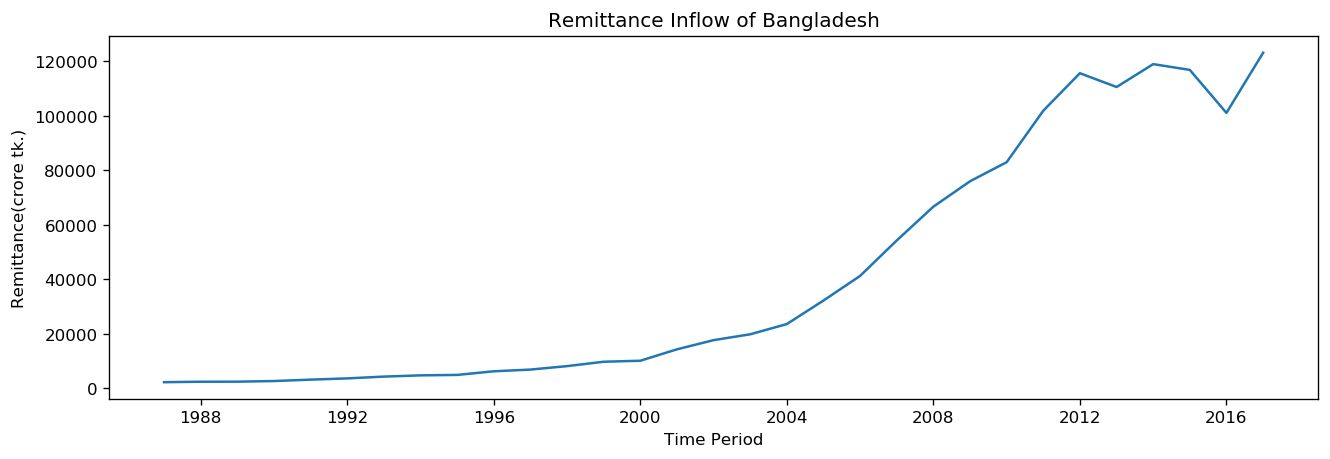

In [19]:
plt.plot(df)
plt.rcParams.update({'figure.figsize': (13, 4), 'figure.dpi': 120})
plt.title('Remittance Inflow of Bangladesh')
plt.xlabel('Time Period')
plt.ylabel('Remittance(crore tk.)')
plt.show()

In [12]:
#check that the time series is not stationary

#Augmented Dickey-Fuller Test
result = adfuller(df['Rem(crore)'])
print('ADF statistic :{}'.format(result[0]))
print('P value :{}'.format(result[1]))
print('Critical value :{}')
for key, value in result[4].items():
    print('\t{}:{}'.format(key,value))

ADF statistic :2.978526990260337
P value :1.0
Critical value :{}
	1%:-3.7883858816542486
	5%:-3.013097747543462
	10%:-2.6463967573696143


### Here, p value is 1 that is greater than threshold(.5).so,time series is not stationary.

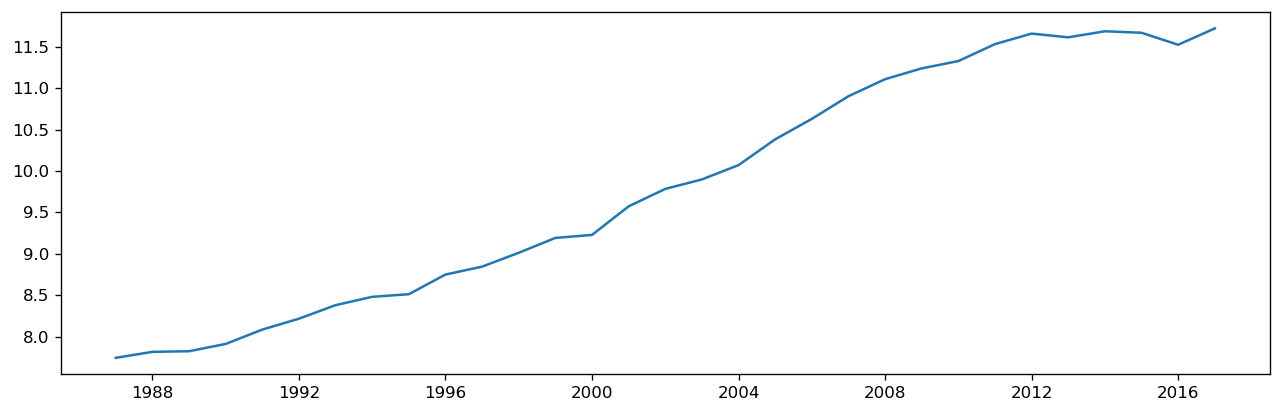

In [20]:
df_log = np.log(df)
plt.plot(df_log)

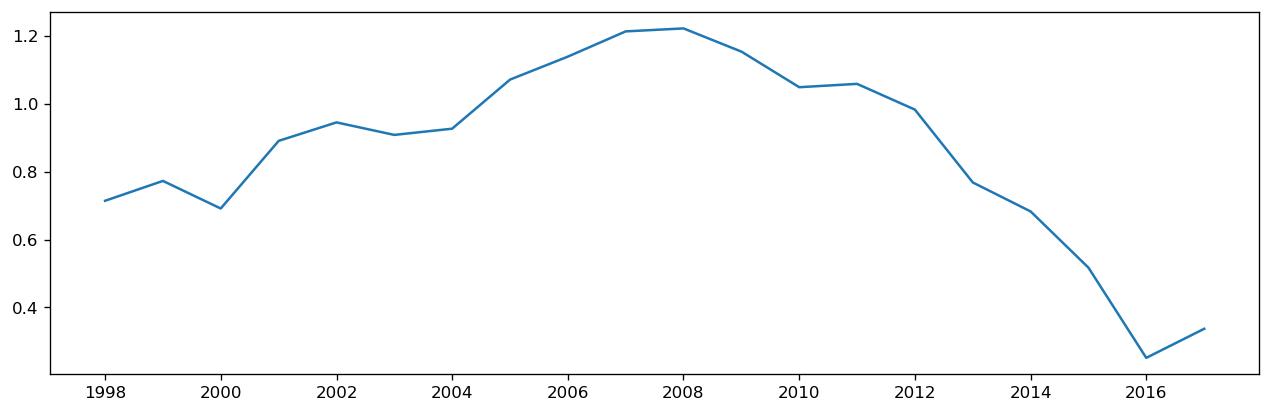

In [21]:
rolling_mean=df_log.rolling(window=12).mean()
df_log_minus_mean =df_log-rolling_mean
plt.plot(df_log_minus_mean)

Text(0.5, 1.0, 'Remittance detrended by subtracting the least squares fit')

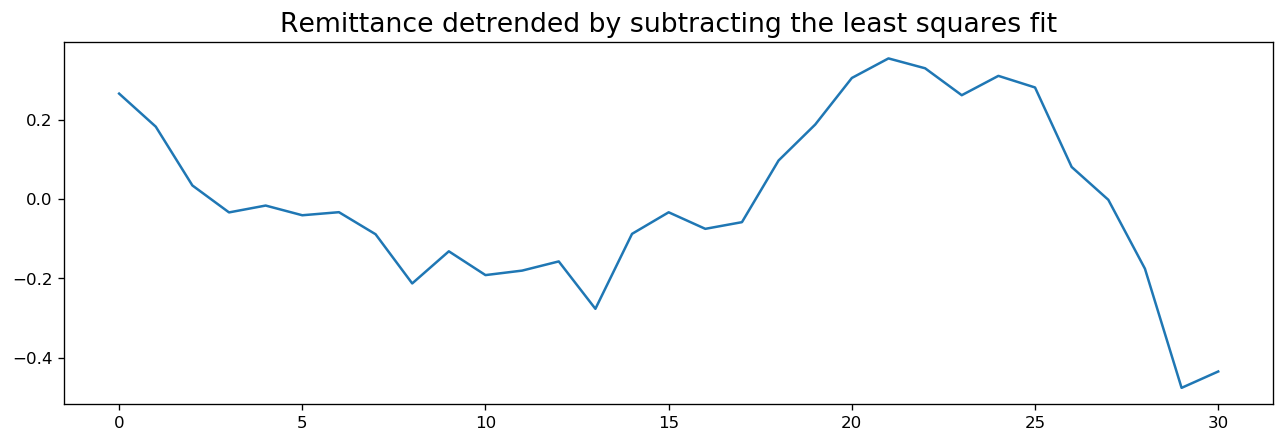

In [24]:
# Using scipy: Subtract the line of best fit
from scipy import signal
#df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'])
detrended = signal.detrend(df_log.Rem.values)# scipy.signal.detrend(data, axis=-1, type='linear', bp=0, overwrite_data=False)
#Remove linear trend along axis from data.

plt.plot(detrended)
plt.title('Remittance detrended by subtracting the least squares fit', fontsize=16)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


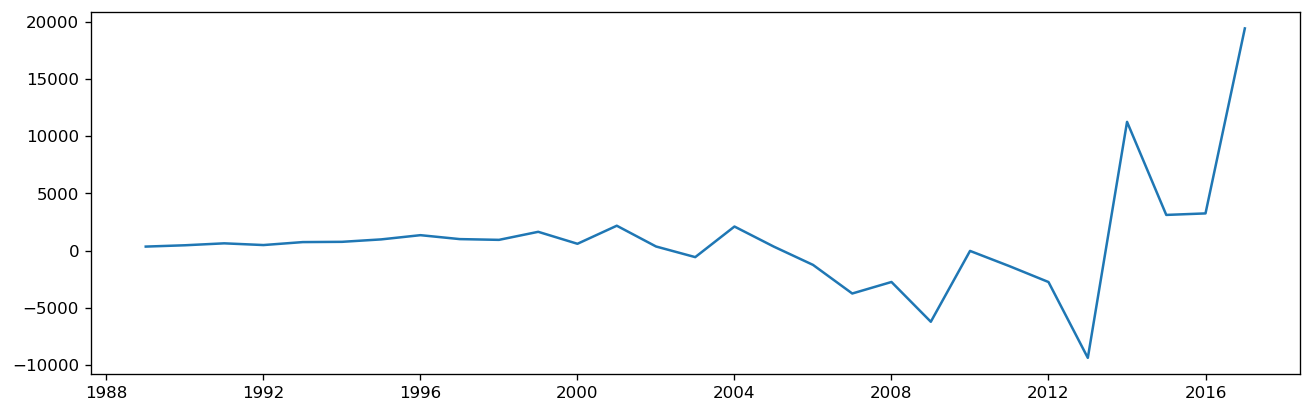

In [95]:

model=ARIMA(df, order=(1,2,2))
results=model.fit(disp=-1)
plt.plot(results.fittedvalues)

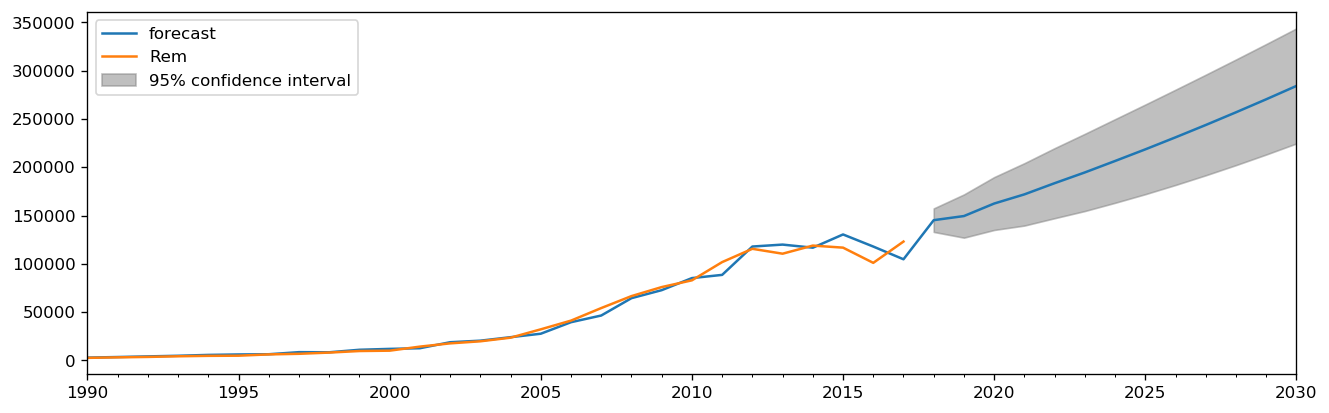

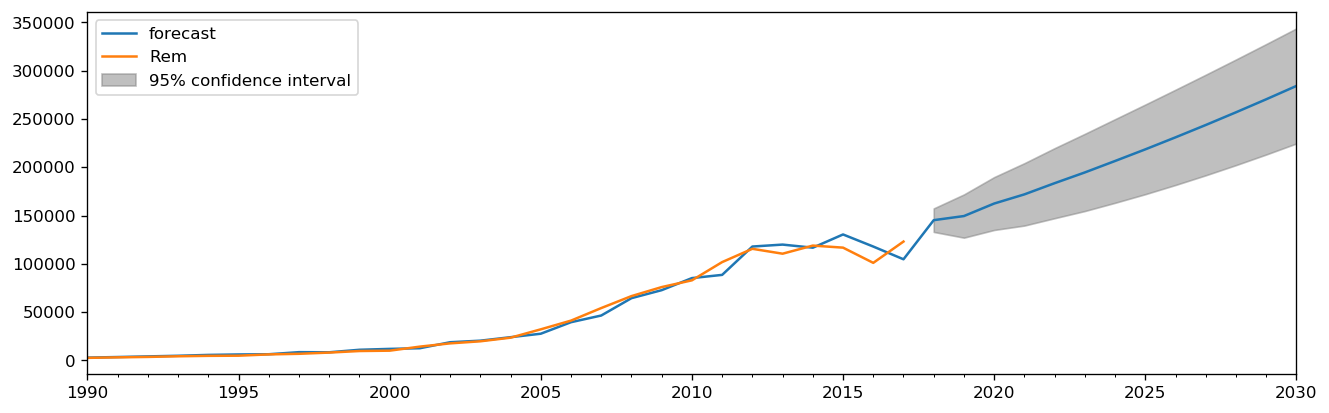

In [96]:
results.plot_predict('1990', '2030')


In [97]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                 D2.Rem   No. Observations:                   29
Model:                 ARIMA(1, 2, 2)   Log Likelihood                -297.076
Method:                       css-mle   S.D. of innovations           6210.844
Date:                Thu, 02 Apr 2020   AIC                            604.152
Time:                        23:36:53   BIC                            610.988
Sample:                    01-01-1989   HQIC                           606.293
                         - 01-01-2017                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const          349.6614    179.671      1.946      0.063      -2.486     701.809
ar.L1.D2.Rem    -0.4576      0.235     -1.947      0.063      -0.918       0.003
ma.L1.D2.Rem  5.731e-08      0.038   1.51e-06      1.000      -0.074       0.074
ma.L2.D2.Rem    -1.0000      0.038    -26.370      0.000      -1.074      -0.926
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -2.1851           +0.0000j            2.1851            0.5000
MA.1           -1.0000           +0.0000j            1.0000            0.5000
MA.2            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""